In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
from pylab import rcParams

#Upload dos dados de 2020 a partir da API da coingecko para um dataframe.
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1577836800&to=1609372800"
data = requests.get(url).json()
df2020 = pd.DataFrame.from_dict(data)

#Upload dos dados de 2019 a partir da API da coingecko para um dataframe.
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1546300800&to=1577750400"
data = requests.get(url).json()
df2019 = pd.DataFrame.from_dict(data)

#Upload dos dados de 2018 a partir da API da coingecko para um dataframe.
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1514764800&to=1546214400"
data = requests.get(url).json()
df2018 = pd.DataFrame.from_dict(data)

def limpeza_dados_preco(prices, marketcaps, volumes):
    
    #Novas variáveis globais para limpeza dos dados
    global cleanprices, cleanmarketcap, cleanvolume, cleandate
    cleanprices = []
    cleanmarketcap = []
    cleanvolume = []
    cleandate = []
    
    #Loop de limpeza dos dados
    for i in range(len(prices)):
        price = prices[i]
        marketcap = marketcaps[i]
        volume = volumes[i]
        epoch_time = price [0]
        
        #Adicionar integers de preço, volume e marketcap sem integer de tempo epoch
        cleanmarketcap.append(marketcap[1])
        cleanvolume.append(volume[1])
        cleanprices.append(price[1])
        cleandate.append(epoch_time/1000)
        

#Criação de dicionairio 2020
limpeza_dados_preco(df2020["prices"], df2020["market_caps"], df2020["total_volumes"])
btcusd2020 = {"Data":cleandate, 
              "BTCUSD":cleanprices, 
              "MarketCap":cleanmarketcap, 
              "Volume":cleanvolume}

#Criação de dicionairio 2019
limpeza_dados_preco(df2019["prices"], df2019["market_caps"], df2019["total_volumes"])
btcusd2019 = {"Data":cleandate, 
              "BTCUSD":cleanprices, 
              "MarketCap":cleanmarketcap, 
              "Volume":cleanvolume}

#Criação de dicionairio 2018
limpeza_dados_preco(df2018["prices"], df2018["market_caps"], df2018["total_volumes"])
btcusd2018 = {"Data":cleandate, 
              "BTCUSD":cleanprices, 
              "MarketCap":cleanmarketcap, 
              "Volume":cleanvolume}

#Criação dataframe limpa.
df_btc_prices2020 = pd.DataFrame(data=btcusd2020)
df_btc_prices2019 = pd.DataFrame(data=btcusd2019)
df_btc_prices2018 = pd.DataFrame(data=btcusd2018)

#Começar index com 1 indicando o dia
df_btc_prices2020.index += 1
df_btc_prices2019.index += 1
df_btc_prices2018.index += 1

#Converter tempo epoch em tempo ISO 8601
df_btc_prices2020["Data"] = pd.to_datetime(df_btc_prices2020["Data"], unit="s")
df_btc_prices2019["Data"] = pd.to_datetime(df_btc_prices2019["Data"], unit="s")
df_btc_prices2018["Data"] = pd.to_datetime(df_btc_prices2018["Data"], unit="s")


inicial_de_cada_mes = ['2020-01-01 00:00:00', 
                       '2020-02-01 00:00:00', 
                       '2020-03-01 00:00:00', 
                       '2020-04-01 00:00:00',
                       '2020-05-01 00:00:00',
                       '2020-06-01 00:00:00',
                       '2020-07-01 00:00:00',
                       '2020-08-01 00:00:00',
                       '2020-09-01 00:00:00',
                       '2020-10-01 00:00:00',
                       '2020-11-01 00:00:00',
                       '2020-12-01 00:00:00',
                       '2019-01-01 00:00:00', 
                       '2019-02-01 00:00:00', 
                       '2019-03-01 00:00:00', 
                       '2019-04-01 00:00:00',
                       '2019-05-01 00:00:00',
                       '2019-06-01 00:00:00',
                       '2019-07-01 00:00:00',
                       '2019-08-01 00:00:00',
                       '2019-09-01 00:00:00',
                       '2019-10-01 00:00:00',
                       '2019-11-01 00:00:00',
                       '2019-12-01 00:00:00',
                       '2018-01-01 00:00:00', 
                       '2018-02-01 00:00:00', 
                       '2018-03-01 00:00:00', 
                       '2018-04-01 00:00:00',
                       '2018-05-01 00:00:00',
                       '2018-06-01 00:00:00',
                       '2018-07-01 00:00:00',
                       '2018-08-01 00:00:00',
                       '2018-09-01 00:00:00',
                       '2018-10-01 00:00:00',
                       '2018-11-01 00:00:00',
                       '2018-12-01 00:00:00']


meses = ["Janeiro",
         "Fevereiro",
         "Março",
         "Abril",
         "Maio",
         "Junho",
         "Julho",
         "Agosto",
         "Setembro",
         "Outubro",
         "Novembro",
         "Dezembro"]


#ROI x dias mensal
def ROIcalculator(dias, df_btc_prices):
    global roimensal, roixdias
    roixdias = []
    for i in range(len(df_btc_prices)):
        if str(df_btc_prices.loc[i+1]["Data"]) in inicial_de_cada_mes:
            roi = (df_btc_prices.loc[i+dias]["BTCUSD"]-df_btc_prices.loc[i+1]["BTCUSD"])/df_btc_prices.loc[i+1]["BTCUSD"]*100
            roixdias.append(roi)

roimensal = pd.DataFrame(data=meses, columns=["Meses"])
roimensal.index += 1
        
ROIcalculator(30, df_btc_prices2020)
roimensal["ROI 30 Dias 2020"] = roixdias
ROIcalculator(30, df_btc_prices2019)
roimensal["ROI 30 Dias 2019"] = roixdias
ROIcalculator(30, df_btc_prices2018)
roimensal["ROI 30 Dias 2018"] = roixdias
roimensal

,Meses,ROI 30 Dias 2020,ROI 30 Dias 2019,ROI 30 Dias 2018
1,Janeiro,28.932528,-7.560019,-21.274867
2,Fevereiro,-8.112014,11.183468,7.366231
3,Março,-30.838949,7.540483,-31.118914
4,Abril,36.169907,26.714450,33.695495
5,Maio,9.482280,63.442241,-18.992419
6,Junho,-2.976617,39.611117,-17.129780
7,Julho,21.245348,-12.651463,28.761396
8,Agosto,1.376801,-5.742374,-8.936134
9,Setembro,-7.152025,-16.059767,-5.998571
10,Outubro,24.798316,13.732711,-5.031514


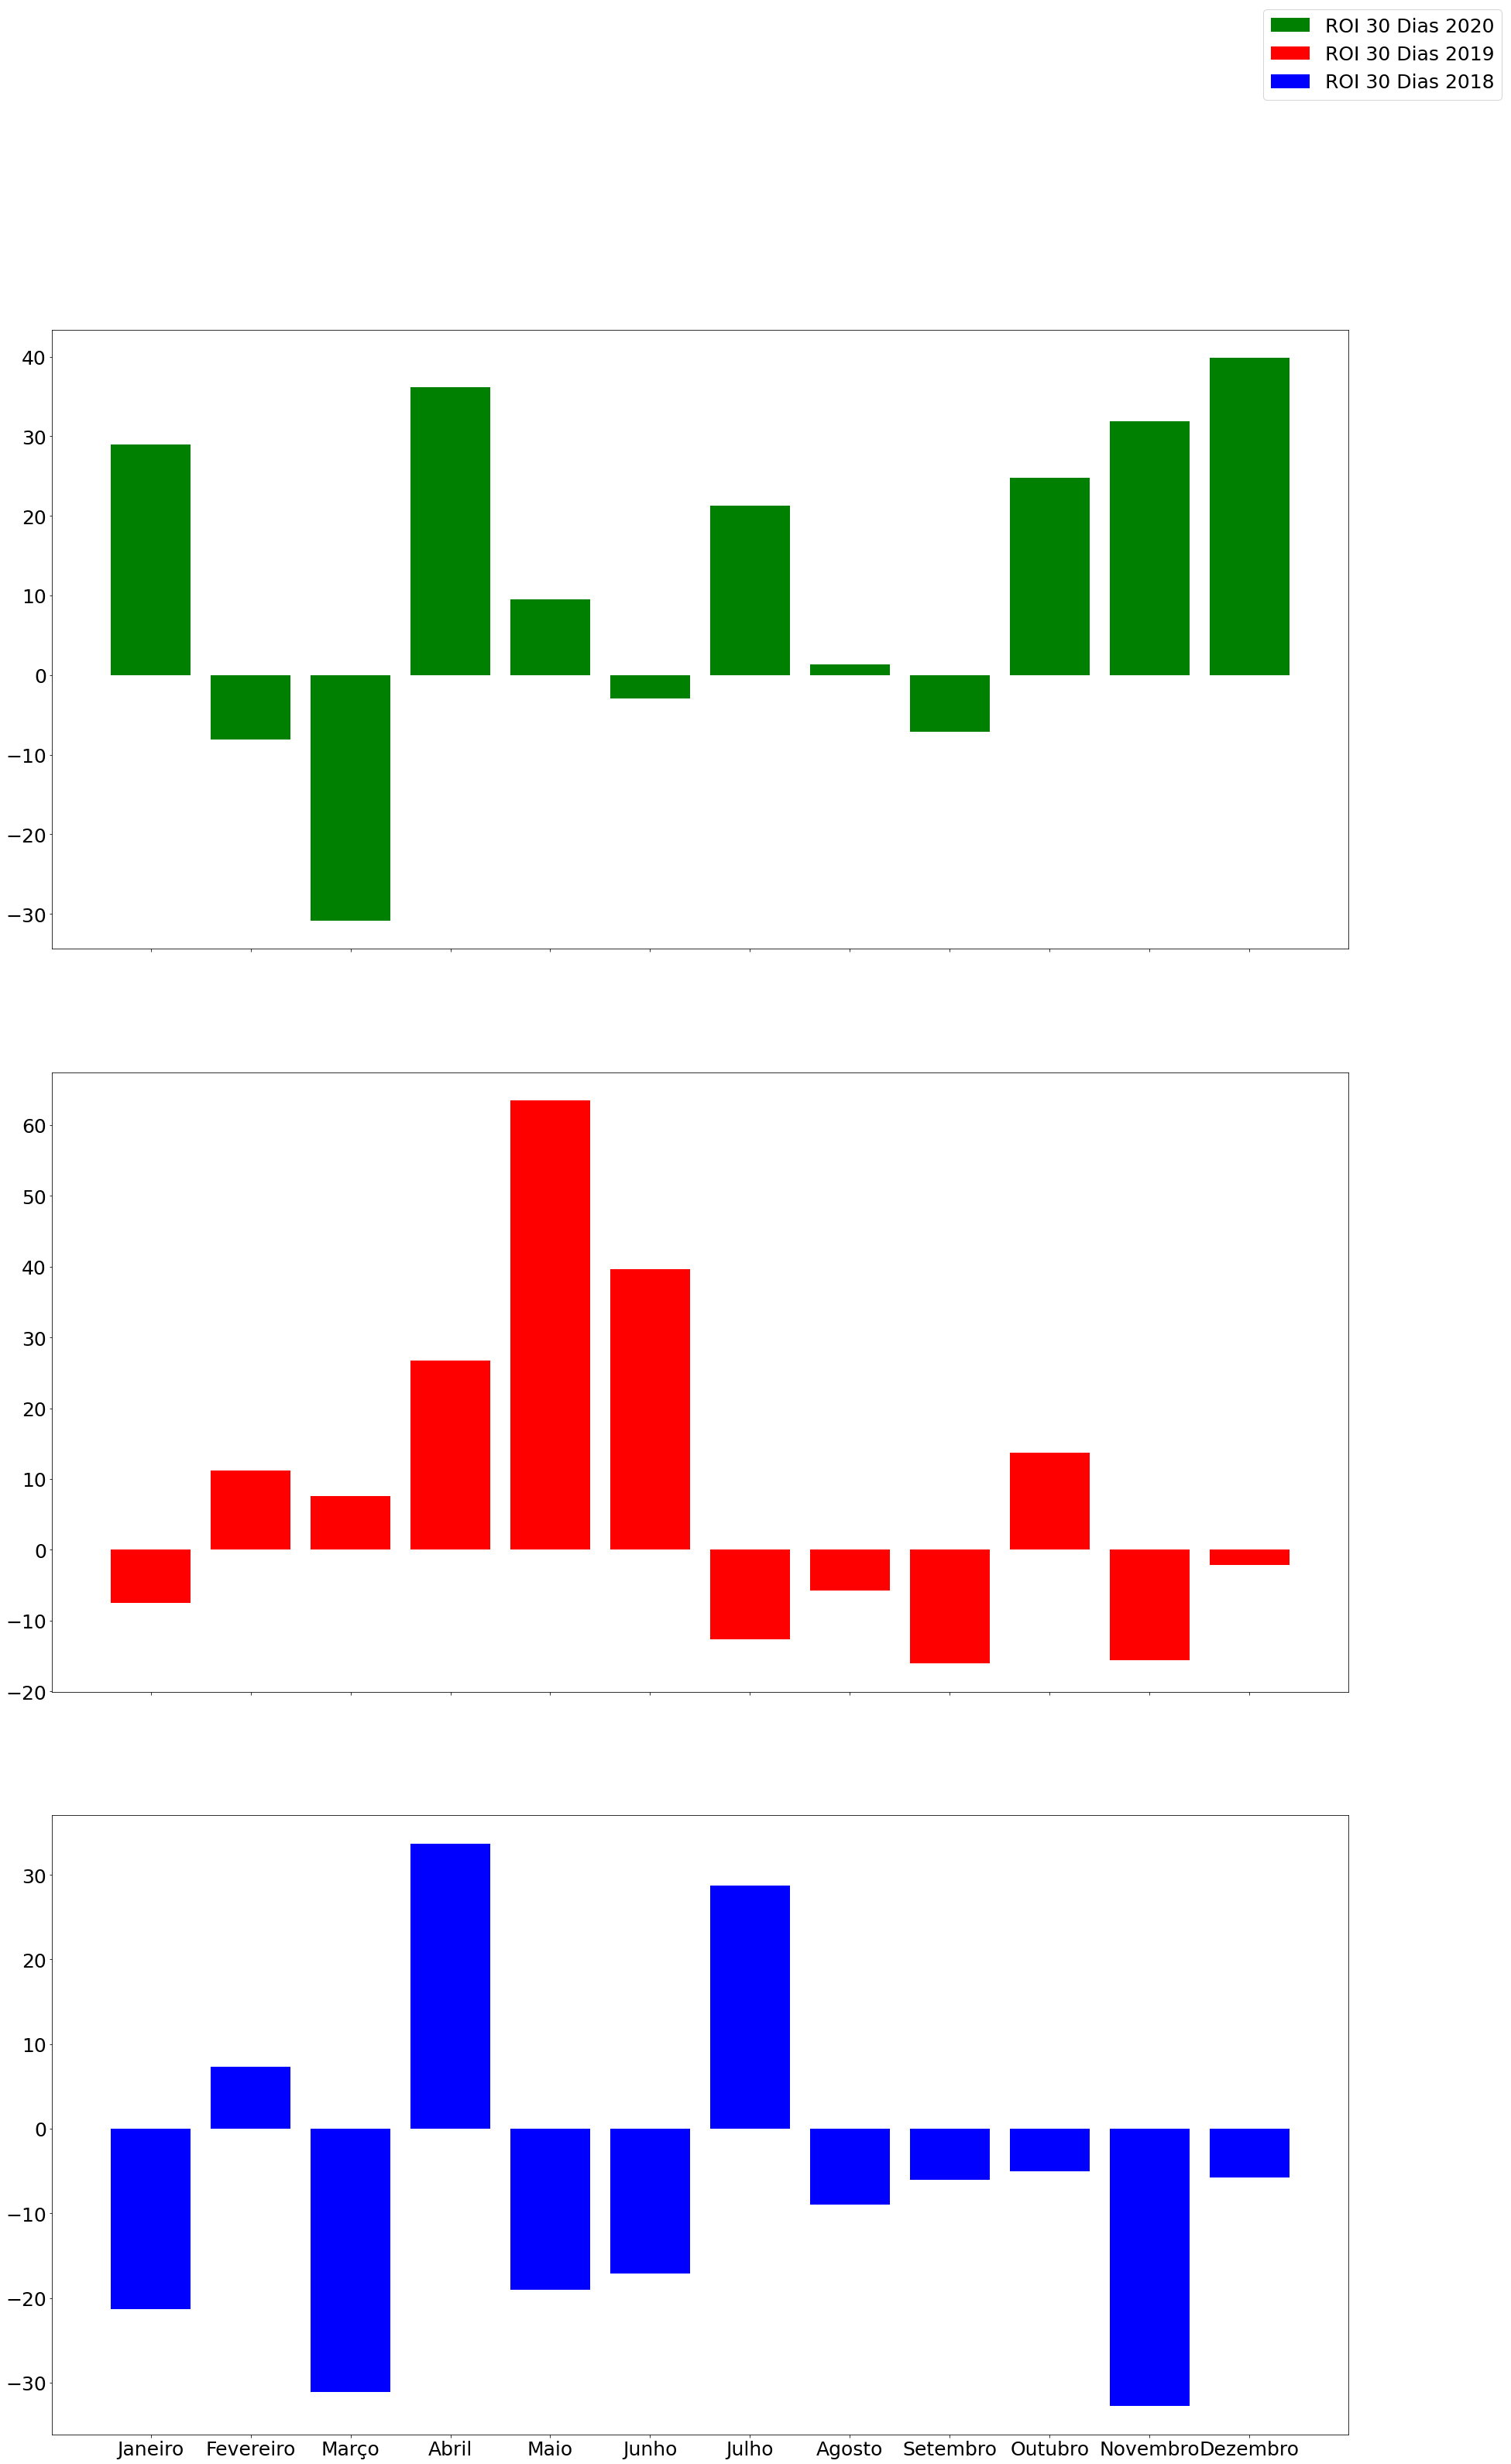

In [37]:
f, axarr = plt.subplots(3, sharex=True)

axarr[0].bar(roimensal["Meses"], 
             roimensal["ROI 30 Dias 2020"], 
             color = "g",
             label = "ROI 30 Dias 2020")
axarr[1].bar(roimensal["Meses"], 
             roimensal["ROI 30 Dias 2019"], 
             color = "r",
             label = "ROI 30 Dias 2019")
axarr[2].bar(roimensal["Meses"], 
             roimensal["ROI 30 Dias 2018"], 
             color = "b",
             label = "ROI 30 Dias 2018")

ax.set_title('ROI 30 Dias mensal')
rcParams['font.size'] = 25
rcParams['figure.figsize'] = 30, 50
f.legend()
plt.show()